In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import special

#Initialize t, theta and arrays

In [2]:
dt=0.1; nt=1000; #Timestep and number of iterations
t0=0; theta0=np.pi*3/4; #Initial time and value

k = 2.0 # define k
g = 10 # define g for energy analysis

t=np.linspace(t0,nt*dt,nt) #Iniatialize arrays

theta=np.zeros(nt)

u=np.zeros(nt)
theta[0]=theta0

In [3]:
for i in range(nt-1):
    u[i+1] = u[i] - dt*np.sin(theta[i])*k**2
    theta[i+1] = theta[i] + dt*u[i+1]
    

In [4]:
#thetaEuler=np.zeros(nt)
#for i in range(nt):
#    thetaEuler[i]=theta[i] #deep copy theta into thetaEuler for analysis

# Do this instead (Python deep copies automatically)
thetaEuler = theta


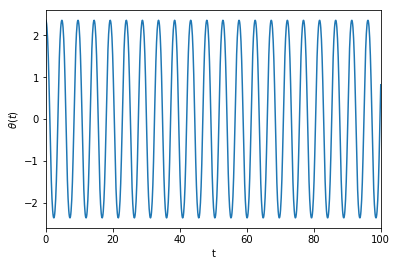

In [5]:
#Plot the result of Euler function
plt.plot(t,thetaEuler)
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,dt*nt)
plt.show()

In [6]:
# Symplectic integrator coefficients
# 1st order: ci = [1 0 0 0] di = [1 0 0 0] 
# 2nd order: ci = [0 1 0 0] di = [0.5 0.5 0 0] 
# 3rd order: ci = [1 -2/3 2/3 0] di = [-1/24 3/4 7/24 0] 
# 4th order: let x = 2-2^(1/3) c1=c4=1/2x, c2=c3=[1-2^(1/3)]/2x, d1=d3=1/x d2=-2^(1/3)/x  d4=0
c = np.array([1, -2.0/3, 2.0/3, 0])
d = np.array([-1.0/24, 3.0/4, 7.0/24, 0])

theta=np.zeros(nt)
u=np.zeros(nt)
theta[0]=theta0

for i in range(nt-1):
    
    theta[i+1] = theta[i] + c[0]*dt*u[i]
    u[i+1] = u[i] - d[0]*dt*np.sin(theta[i+1])*k**2
    
    theta[i+1] = theta[i+1] + c[1]*dt*u[i+1]
    u[i+1] = u[i+1] - d[1]*dt*np.sin(theta[i+1])*k**2
    
    theta[i+1] = theta[i+1] + c[2]*dt*u[i+1]
    u[i+1] = u[i+1] - d[2]*dt*np.sin(theta[i+1])*k**2
    
    theta[i+1] = theta[i+1] + c[3]*dt*u[i+1]
    u[i+1] = u[i+1] - d[3]*dt*np.sin(theta[i+1])*k**2
    

#thetaSym=np.zeros(nt)
#for i in range(nt):
#    thetaSym[i]=theta[i] #deep copy theta into thetaSym for analysis

# Do this instead  
thetaSym = theta

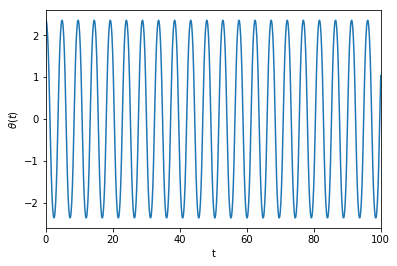

In [7]:
#Plot the result of symplectic integrator
plt.plot(t,thetaSym)
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,dt*nt)
plt.show()

In [8]:
x = np.sin(theta0/2)
eK = sp.special.ellipk(x**2) # complete elliptic integral of the first kind
eJ = sp.special.ellipj(eK - k*t, x**2) # Jacobian elliptic function
thetaAna = 2*np.arcsin(x*eJ[0]) # ellipj returns 4 values, we only need 1st
#store analytic solution in thetaAna

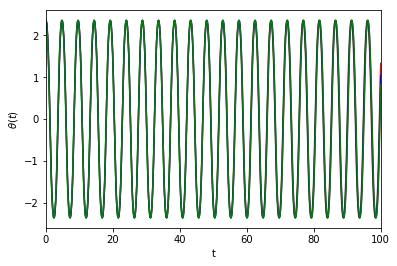

In [9]:
#Plot the result
plt.plot(t,thetaAna, color = 'r') #Analytical solution is red
plt.plot(t,thetaSym, color = 'b' ) # Symplectic solution is blue
plt.plot(t,thetaEuler, color = 'g' ) # Euler solution is green
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,dt*nt)
plt.show()

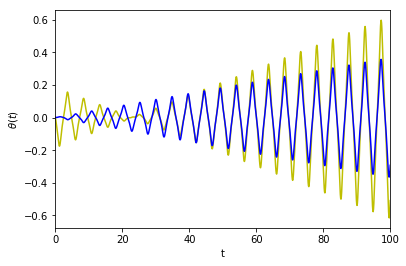

In [10]:
#Plot the error
#plt.plot(t,thetaAna, color = 'r') #Analytical solution is red
plt.plot(t,thetaEuler-thetaAna, color = 'y' ) # Euler function error is yellow
plt.plot(t,thetaSym-thetaAna, color = 'b' ) # Symplectic error is blue
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,dt*nt)
plt.show()

In [11]:
def energy(u,theta):
    
    return g**2/k**2*(1/(2*k**2)*u**2-np.cos(theta))

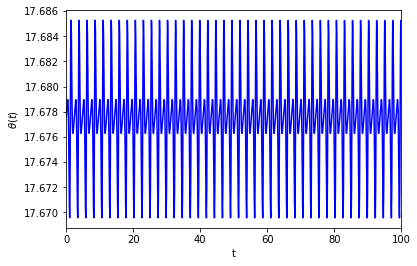

In [14]:
#te = np.zeros(nt)

#for i in range(nt):
#    te[i] = energy(u[i],theta[i])

# Do this instead
te = energy(u,theta)
  
plt.plot(t,te, color = 'b' ) 
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,dt*nt)
plt.show() 
    
